In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

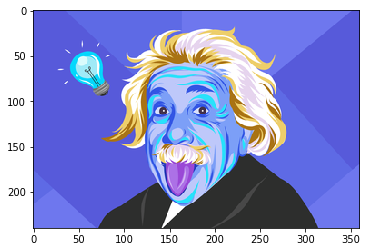

In [2]:
image = cv2.imread('gambar1.png')
plt.imshow(image)

In [3]:
kernel = np.ones((3,3), np.uint8)

def erosi(img, elemen):
    ksize = elemen.shape[0]
    i, j = img.shape[:2]
    border = ksize//2
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    padding = np.full((i+border*2, j+border*2), 255)
    padding = cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_CONSTANT, value=255)
    for i in range(border, i+border):
        for j in range(border, j+border):
            if(img[i-border, j-border] == 0):
                padding[i-border:(i+border)+1, j-border:(j+border)+1] = cv2.bitwise_and(padding[i-border:(i+border)+1, j-border:(j+border)+1], elemen)
    return padding[border:i+border, border:j+border]

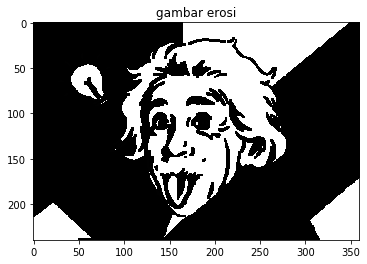

In [4]:
errosi = erosi(image, kernel)
# plt.title("gambar asli")
# plt.imshow(image)
# plt.title("gambar grayscale")
# plt.imshow(image, cmap='gray')
plt.title("gambar erosi")
plt.imshow(errosi, cmap='gray')
plt.show()